# import modules

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# helper functions (if needed)

In [10]:
# python code...

# read training data into data frame

In [6]:
train_data = pd.read_csv('train.csv')
print(train_data)

       age         workclass     education  education-num      marital-status  \
0       39         State-gov     Bachelors             13       Never-married   
1       50  Self-emp-not-inc     Bachelors             13  Married-civ-spouse   
2       38           Private       HS-grad              9            Divorced   
3       53           Private          11th              7  Married-civ-spouse   
4       37           Private       Masters             14  Married-civ-spouse   
...    ...               ...           ...            ...                 ...   
26044   43           Private     Assoc-voc             11  Married-civ-spouse   
26045   32           Private       Masters             14       Never-married   
26046   53           Private       Masters             14  Married-civ-spouse   
26047   22           Private  Some-college             10       Never-married   
26048   40           Private       HS-grad              9  Married-civ-spouse   

              occupation   

# analyze and visualize data to find candidate features

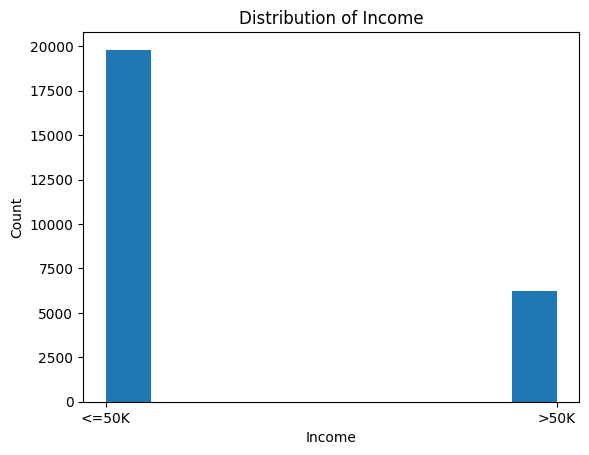

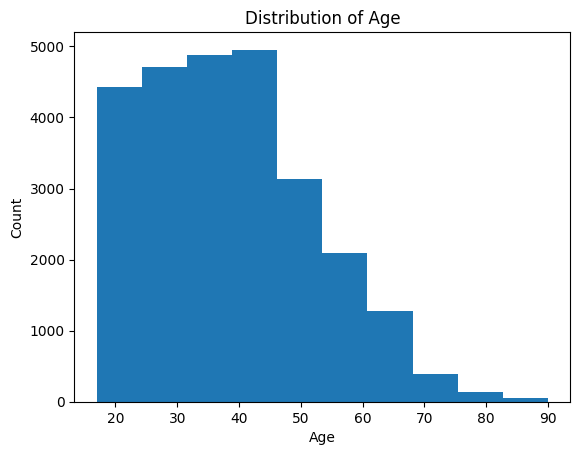

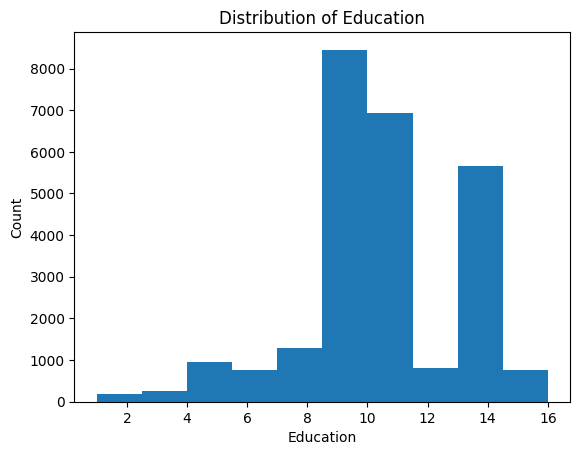

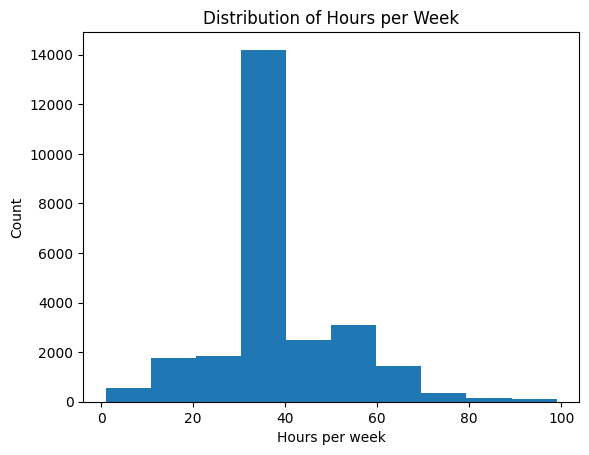

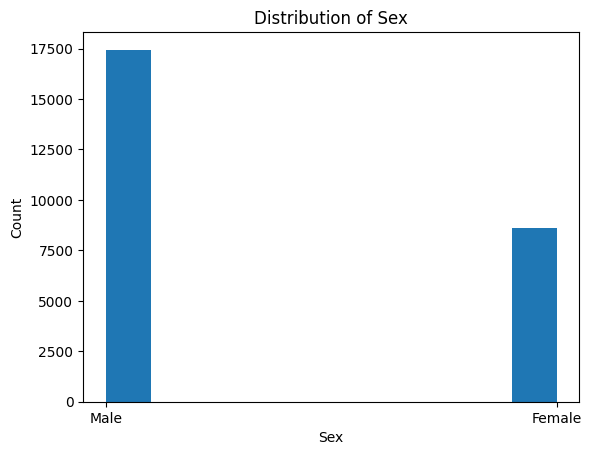

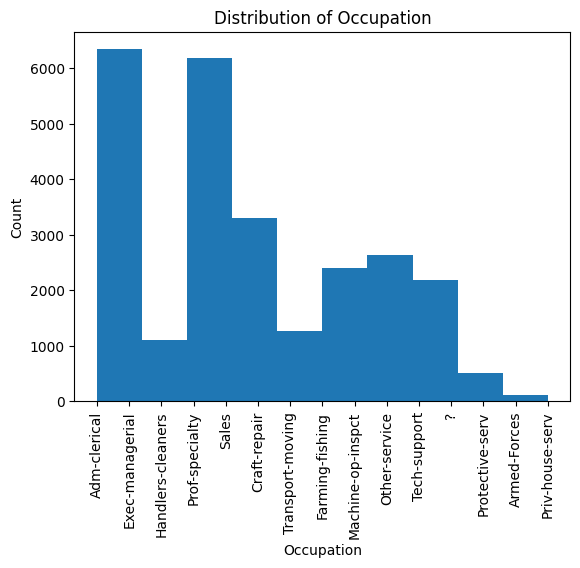

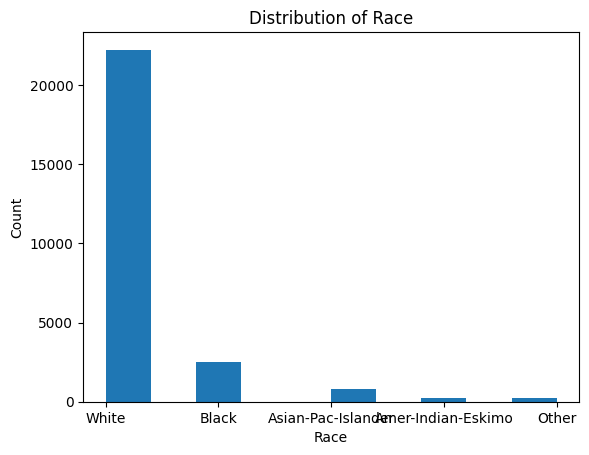

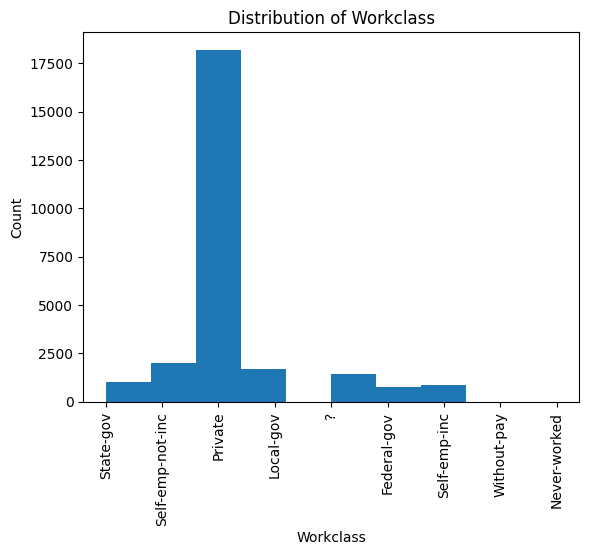

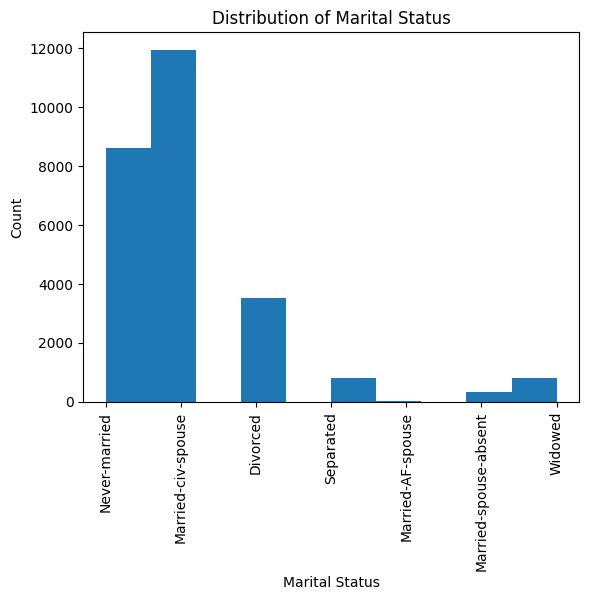

In [7]:
# Plot the distribution of the target variable (income)
plt.hist(train_data['income'])
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income')
plt.show()

# Plot the distribution of the age feature
plt.hist(train_data['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

# Plot the distribution of the education-num feature
plt.hist(train_data['education-num'])
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education')
plt.show()

# Plot the distribution of the hours-per-week feature
plt.hist(train_data['hours-per-week'])
plt.xlabel('Hours per week')
plt.ylabel('Count')
plt.title('Distribution of Hours per Week')
plt.show()

# Plot the distribution of the sex feature
plt.hist(train_data['sex'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

# Plot the distribution of the occupation feature
plt.hist(train_data['occupation'])
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Distribution of Occupation')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of the race feature
plt.hist(train_data['race'])
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Race')
plt.show()

# Plot the distribution of the workclass feature
plt.hist(train_data['workclass'])
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Distribution of Workclass')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of the marital-status feature
plt.hist(train_data['marital-status'])
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status')
plt.xticks(rotation=90)
plt.show()

# split training data into features (X) and targets (y)

In [9]:
X = train_data.drop('income', axis=1)
y = train_data['income']

# convert categorical data from strings to integers 

In [20]:
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for col in cat_cols:
    train_data[col] = pd.Categorical(train_data[col]).codes

# experiment w/ classifying training data using various feature sets

In [22]:
feature_sets = [
    ['age', 'workclass', 'education', 'education-num', 'occupation', 'hours-per-week'],
    ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week'],
    list(train_data.drop('income', axis=1).columns)  # Use all features
]

for i, features in enumerate(feature_sets):
    X = train_data[features]
    y = train_data['income']

    # Split the data into training and validation sets
    split_idx = int(len(X) * 0.8)
    X_train, y_train = X[:split_idx], y[:split_idx]
    X_val, y_val = X[split_idx:], y[split_idx:]

    # Train a Naive Bayes classifier on the training set
    clf = GaussianNB()
    clf.fit(X_train, y_train)

    # Make predictions on the validation set and compute accuracy
    y_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    print(f'Feature set {i+1}: {features}')
    print(f'Validation accuracy: {accuracy:.3f}')

Feature set 1: ['age', 'workclass', 'education', 'education-num', 'occupation', 'hours-per-week']
Validation accuracy: 0.792
Feature set 2: ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week']
Validation accuracy: 0.780
Feature set 3: ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week', 'native-country']
Validation accuracy: 0.778


# analyze and visualize experimental results

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (11,) and arg 1 with shape (3,).

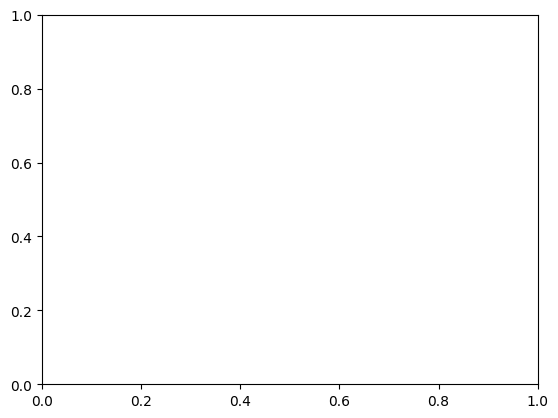

In [24]:
accuracies = [0.792, 0.780, 0.778]

fig, ax = plt.subplots()
ax.bar(range(len(features)), accuracies, color='b')
ax.set_xticks(range(len(features)))
ax.set_xticklabels([f"Feature set {i+1}" for i in range(len(feature_sets))])
ax.set_ylim([0.5, 0.8])
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Random Forest Classifier with Different Feature Sets')

# Question: What features work "best"?  Why?

This is subjective and will depend on the data. Generally, features that are strongly correlated with the target variable (income) will work well. In this case, education level, age, and hours worked per week are likely to be strong predictors.

# create "best" classification model based on training data

In [8]:
# For example, use all available features
categories = pd.Categorical(X_train['workclass'])
X_train['workclass'] = categories.codes

categories = pd.Categorical(X_train['marital-status'])
X_train['marital-status'] = categories.codes

categories = pd.Categorical(X_train['occupation'])
X_train['occupation'] = categories.codes

categories = pd.Categorical(X_train['relationship'])
X_train['relationship'] = categories.codes

categories = pd.Categorical(X_train['race'])
X_train['race'] = categories.codes

categories = pd.Categorical(X_train['sex'])
X_train['sex'] = categories.codes

categories = pd.Categorical(X_train['native-country'])
X_train['native-country'] = categories.codes

gnb = GaussianNB()
gnb.fit(X_train, y_train)

# read in test data 

In [9]:
test_df = pd.read_csv('test.csv')
print(test_df)

# use model to make predictions of test data

In [10]:
# Convert categorical features from strings to integers using the same encoding as for the training data
test_df['workclass'] = test_df['workclass'].apply(lambda x: workclass_dict[x])
test_df['education'] = test_df['education'].apply(lambda x: education_dict[x])
test_df['marital-status'] = test_df['marital-status'].apply(lambda x: marital_status_dict[x])
test_df['occupation'] = test_df['occupation'].apply(lambda x: occupation_dict[x])
test_df['relationship'] = test_df['relationship'].apply(lambda x: relationship_dict[x])
test_df['race'] = test_df['race'].apply(lambda x: race_dict[x])
test_df['sex'] = test_df['sex'].apply(lambda x: sex_dict[x])
test_df['native-country'] = test_df['native-country'].apply(lambda x: native_country_dict[x])

# Make predictions for test data
test_pred = clf.predict(test_df)

# write test data with predicted labels

In [11]:
# Write test data with predicted labels to file
test_df['income'] = test_pred
test_df.to_csv('Rakowicz.csv', index=False)